# **Principles of Data Science Assignment**
#### **Submitted By:** Luke Chugh
#### **Date:** 25/02/2022

#### **Problem Statement:** 

The practice of mushroom picking is still enjoyed by many people, but wild mushrooms can be very dangerous to eat without knowing exactly which are
safe, and which are poisonous. Therefore, building a model to help in the identification of poisonous mushrooms, based on the features of the mushrooms
themselves, may help people to stay safe and well. The dataset presents data on a variety of features representing the physical and environment
characteristics of mushroom species. Your task is to build a classification model capable of predicting the class of the mushrooms (i.e., whether they are
poisonous or edible), and to attempt to identify which features are most indicative of poisonous mushrooms.

#### **Importing Data:** 

In [1]:
data <- read.csv('/content/mushrooms.csv')

In [2]:
dim(data)

[1] 8124   23

In [3]:
str(data)

'data.frame':	8124 obs. of  23 variables:
 $ cap.shape               : chr  "x" "x" "b" "x" ...
 $ cap.surface             : chr  "s" "s" "s" "y" ...
 $ cap.color               : chr  "n" "y" "w" "w" ...
 $ bruises                 : chr  "t" "t" "t" "t" ...
 $ odor                    : chr  "p" "a" "l" "p" ...
 $ gill.attachment         : chr  "f" "f" "f" "f" ...
 $ gill.spacing            : chr  "c" "c" "c" "c" ...
 $ gill.size               : chr  "n" "b" "b" "n" ...
 $ gill.color              : chr  "k" "k" "n" "n" ...
 $ stalk.shape             : chr  "e" "e" "e" "e" ...
 $ stalk.root              : chr  "e" "c" "c" "e" ...
 $ stalk.surface.above.ring: chr  "s" "s" "s" "s" ...
 $ stalk.surface.below.ring: chr  "s" "s" "s" "s" ...
 $ stalk.color.above.ring  : chr  "w" "w" "w" "w" ...
 $ stalk.color.below.ring  : chr  "w" "w" "w" "w" ...
 $ veil.type               : chr  "p" "p" "p" "p" ...
 $ veil.color              : chr  "w" "w" "w" "w" ...
 $ ring.number             : chr  "o" "o

#### **Checking for missing values:**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’


Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


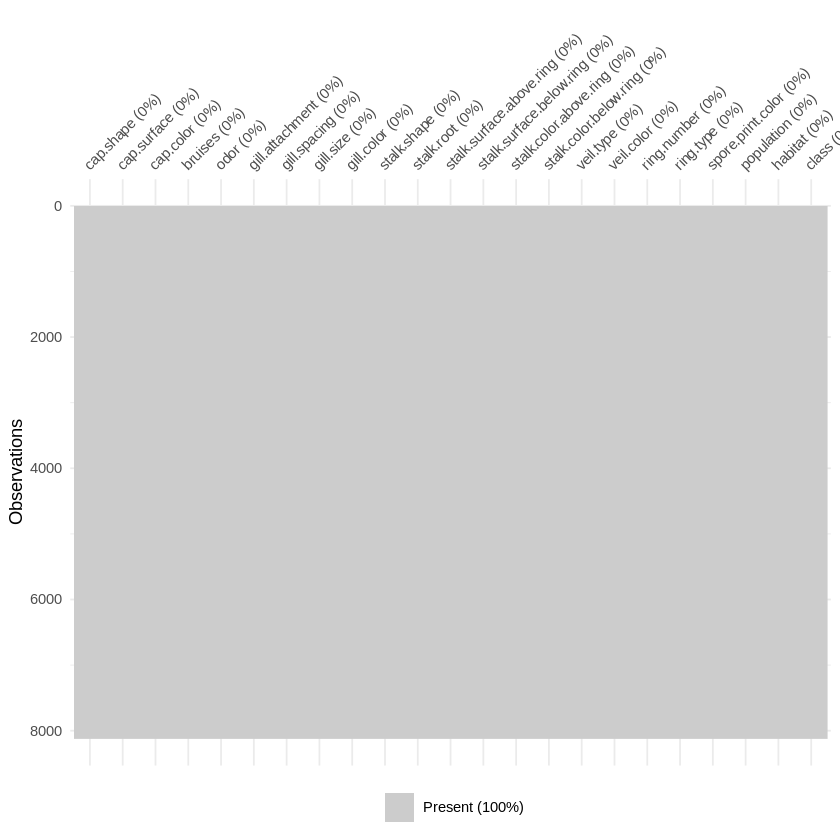

In [4]:
install.packages('naniar')
library(naniar)
vis_miss(data)

###### There are no missing values, so we are good to go....

#### **Preprocessing the data: Converting categories into labels using Label Encoder**

In [5]:
install.packages('superml')
library(superml)
encoder <- LabelEncoder$new()

for (i in 1:23) { data[i] <- encoder$fit_transform(data[[i]])}
View(head(data))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Metrics’, ‘BH’, ‘RcppArmadillo’


Loading required package: R6



,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,stalk.shape,⋯,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,spore.print.color,population,habitat,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,1,0,0,⋯,0,0,0,0,0,0,1,1,1,1
3,1,0,2,0,2,0,0,1,1,0,⋯,0,0,0,0,0,0,1,1,2,1
4,0,1,2,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,3,1,3,0,1,1,0,1,⋯,0,0,0,0,0,1,1,2,1,1
6,0,1,1,0,1,0,0,1,1,0,⋯,0,0,0,0,0,0,0,1,1,1


#### **Let's find unique values for each attribute:**

In [6]:
for (i in 1:23) { View( unique( data[i] ) ) }

,cap.shape
,<dbl>
1,0
3,1
16,2
17,3
4277,4
5127,5


,cap.surface
,<dbl>
1,0
4,1
15,2
5108,3


,cap.color
,<dbl>
1,0
2,1
3,2
5,3
940,4
2211,5
3985,6
4077,7
4166,8


,bruises
,<dbl>
1,0
5,1


,odor
,<dbl>
1,0
2,1
3,2
5,3
1817,4
2211,5
4024,6
4330,7
6416,8


,gill.attachment
,<dbl>
1,0
6039,1


,gill.spacing
,<dbl>
1,0
5,1


,gill.size
,<dbl>
1,0
2,1


,gill.color
,<dbl>
1,0
3,1
7,2
9,3
13,4
128,5
891,6
3985,7
4024,8


,stalk.shape
,<dbl>
1,0
5,1


,stalk.root
,<dbl>
1,0
2,1
30,2
34,3
3985,4


,stalk.surface.above.ring
,<dbl>
1,0
81,1
1817,2
6913,3


,stalk.surface.below.ring
,<dbl>
1,0
15,1
34,2
1817,3


,stalk.color.above.ring
,<dbl>
1,0
306,1
336,2
1817,3
2129,4
3985,5
6039,6
6416,7
6913,8


,stalk.color.below.ring
,<dbl>
1,0
306,1
633,2
1817,3
2386,4
4292,5
4495,6
6039,7
6416,8


,veil.type
,<dbl>
1,0


,veil.color
,<dbl>
1,0
6039,1
6376,2
6913,3


,ring.number
,<dbl>
1,0
3985,1
6416,2


,ring.type
,<dbl>
1,0
5,1
1817,2
4077,3
6416,4


,spore.print.color
,<dbl>
1,0
2,1
77,2
1817,3
3985,4
4107,5
6376,6
6425,7
6559,8


,population
,<dbl>
1,0
2,1
5,2
9,3
16,4
3985,5


,habitat
,<dbl>
1,0
2,1
3,2
30,3
34,4
3985,5
4105,6


,class
,<dbl>
1,0
2,1


#### **We should drop the feature "veil.type" as it has no unique values:**


In [7]:
print(sum(unique(data$veil.type)))

[1] 0


#### **Let's find unique correlations of each attribute stratified by class labels:**




In [8]:
# Dropping "veil.type"
data <- data[-16]
attributes <- c("cap.shape", 
  "cap.surface", "cap.color", "bruises", "odor", "gill.attachment", 
  "gill.spacing", "gill.size", "gill.color", "stalk.shape", "stalk.root", 
  "stalk.surface.above.ring", "stalk.surface.below.ring", "stalk.color.above.ring", 
  "stalk.color.below.ring", "veil.color", "ring.number", 
  "ring.type", "spore.print.color", "population", "habitat")

correlations_wrt_class = numeric(21)
z = numeric(21)
for ( i in 1:21 ) { correlations_wrt_class[i] <- cor(data[[i]], data$class) }
correlations <- data.frame(attributes, correlations_wrt_class)
View(correlations)

attributes,correlations_wrt_class
<chr>,<dbl>
cap.shape,-0.11211032
cap.surface,0.16966305
cap.color,-0.04202825
bruises,-0.50153038
odor,-0.58201543
gill.attachment,0.12919986
gill.spacing,0.34838679
gill.size,0.54002436
gill.color,-0.41286943


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




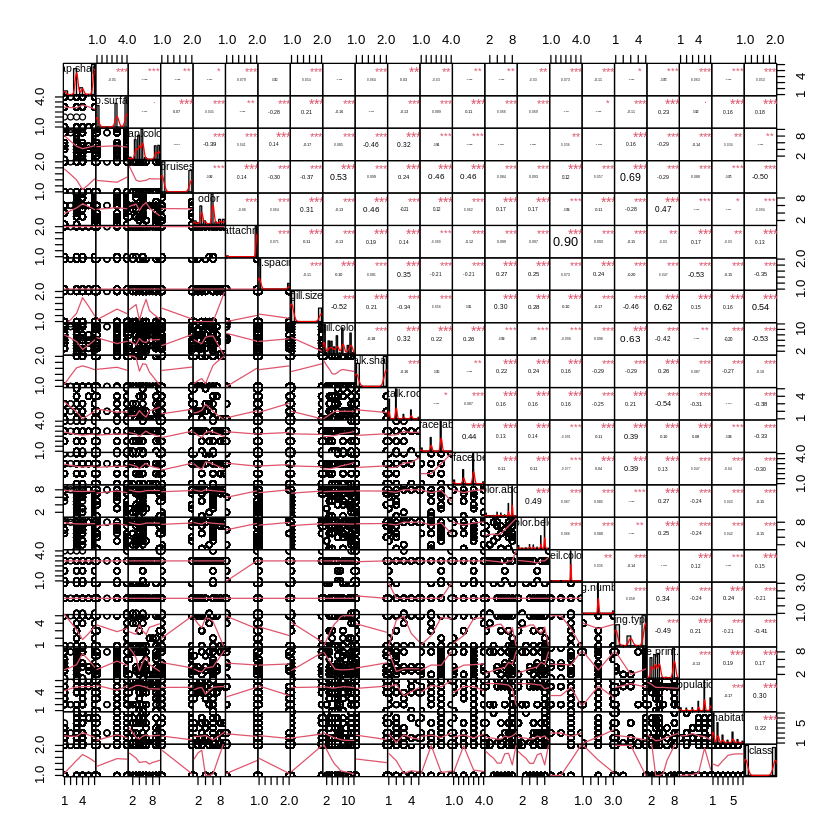

In [9]:
install.packages('PerformanceAnalytics')
library(PerformanceAnalytics)
data2 <- read.csv('/content/mushrooms.csv')
data2 <- data2[-16]
for (i in 1:22) { data2[i] <- as.numeric(as.factor(data2[[i]]))}
chart.Correlation(data2, histogram = TRUE)

The reason why correlation is not optimal to do feature selection is that correlation is the measure of strength of linear relationship between two variables, as we can explicitly observe in the last row of Performance Analytics Chart above, 9 charts out of 21 in the last row are non-linear. Some out of these 9 may have a non-linear strong relationship with class labels and the correlation value for them will be less. Considering correlation as feature selection method may lead us to drop these non-linear strong relationships which will decrease accuracy. That's why we will use Boruta library for feature selection. The way it works is that: First it will create duplicates of all independent variables. It will shuffle the values of added duplicate copies in order to remove their correlation with the target variable which in our case are the class labels. These duplicated copies are known as shadow variables. Then it runs a random forest classifier on the combined dataset and performs a variable importance measure. After this step Z-Score is computed amongst shadow attributes to calculate MZSA i.e. Maximum Z Score Amongst Shadow Attributes. After arranging these shadow attributes in descending order based upon their MZSA values; shadow attributes which have a score below a certain threshold are declared as "Un-Important".

#### **Feature Selection using Boruta:**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘ranger’


 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

 11. run of importance source...

 12. run of importance source...

After 12 iterations, +1 mins: 

 confirmed 21 attributes: bruises, cap.color, cap.shape, cap.surface, gill.attachment and 16 more;

 no more attributes left.




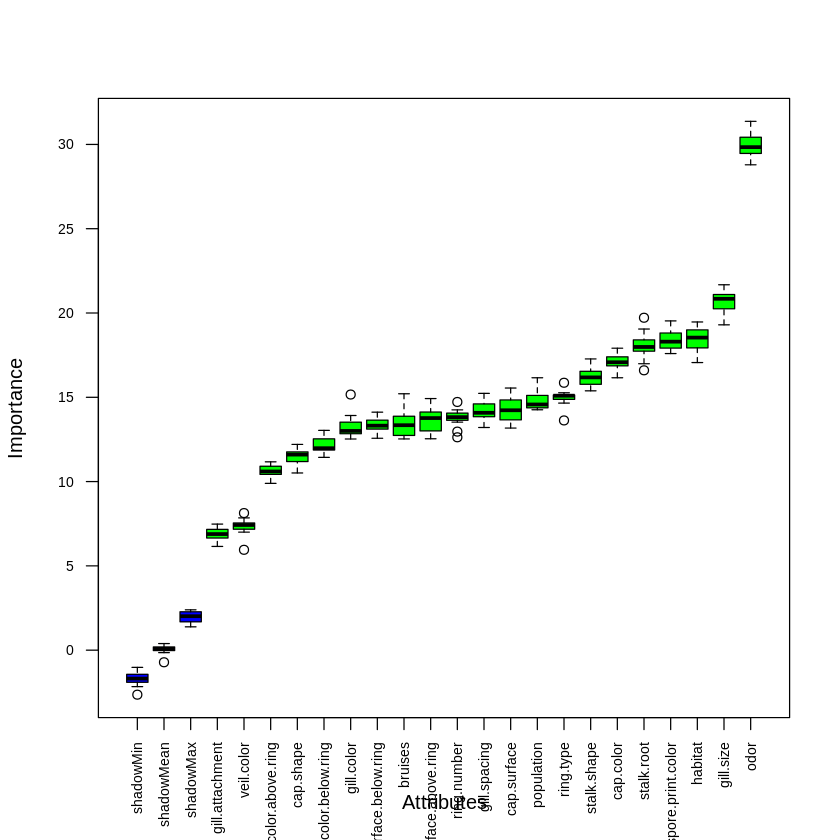

In [10]:
install.packages('Boruta')
library(Boruta)
boruta <- Boruta(data$class ~. , data = data, doTrace = 2, maxRuns = 500)
plot(boruta, las = 2, cex.axis = 0.7)

#### **The most indicative features of poisonous mushrooms are:**



1.   odor
2.   gill.size
3.   habitat
4.   spore.print.color
5.   stalk.root
6.   cap.color
7.   stalk.shape
8.   population
9.   ring.type
10.  gill.spacing
11.  cap.surface



As expected some of the features which had strong correlation with the class labels, namely, stalk.surface.below.ring, stalk.surface.above.ring and bruises didn't made it to the top 10 most important features and on the contrary, features such as stalk.shape, cap.color, population, cap.surface etc. which had correlations of 0.1, -0.04, -0.155, 0.169 respectively with the class labels, made it to the top 10 most indicative features for poisonous mushrooms. This verifies our explanation of why correlation is not a good measure of Feature Importance.

#### **Removing insignificant features and preparing test and train datasets:**

In [11]:
featured_data <- data[c('odor', 'gill.size', 'habitat', 'spore.print.color', 
        'stalk.root', 'cap.color', 'stalk.shape', 'population', 'ring.type', 
        'gill.spacing', 'cap.surface', 'class')]

install.packages('caTools')
library('caTools')

set.seed(101)
sample = sample.split(featured_data, SplitRatio = .75)
train = subset(featured_data, sample == TRUE)
test  = subset(featured_data, sample == FALSE)

# We don't want to scale our class labels
train[-12] <- scale(train[-12])
test[-12] <- scale(test[-12])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




#### **Logistic Regression:**

In [12]:
log_reg <- glm(train$class ~.,family=binomial(link='logit'),data=train)

y_pred <- predict(log_reg,newdata=test[-12],type='response')
y_pred <- ifelse(y_pred > 0.5,1,0)
misClasificError <- mean(y_pred != test$class)
log_reg_accuracy <- (1-misClasificError)*100 
print(paste('Accuracy of Logistic Regressor = ', log_reg_accuracy))

[1] "Accuracy of Logistic Regressor =  97.095027080256"


#### **SVM Classifier:**

In [13]:
install.packages('e1071')
library(e1071)
 
svm_clf = svm(formula = train$class ~ ., data = train, type = 'C-classification',  kernel = 'linear')
y_pred = predict(svm_clf, newdata = test[-12])
misClasificError <- mean(y_pred != test$class)
svm_clf_accuracy <- (1-misClasificError)*100 
print(paste('Accuracy of SVM Classifier = ',svm_clf_accuracy ))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’



Attaching package: ‘e1071’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




[1] "Accuracy of SVM Classifier =  97.4396848842935"


#### **Naive Bayes Classifier:**

In [14]:
install.packages('naivebayes')
library(naivebayes)

NB_clf <- naive_bayes(as.character(train$class) ~ ., data = train, usekernel = T) 
y_pred = predict(NB_clf, newdata = test[-12])
misClasificError <- mean(y_pred != test$class)
NB_clf_accuracy <- (1-misClasificError)*100 
print(paste('Accuracy of Naive Bayes Classifier = ',NB_clf_accuracy ))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

naivebayes 0.9.7 loaded



[1] "Accuracy of Naive Bayes Classifier =  96.1595273264402"


#### **Random Forest Classifier:**

In [15]:
install.packages("randomForest")
library(randomForest)

rf_clf <- randomForest(as.factor(train$class) ~ ., data = train, ntree = 500, type = 'class', importance = TRUE)
y_pred = predict(rf_clf, newdata = test[-12])
misClasificError <- mean(y_pred != test$class)
rf_clf_accuracy <- (1-misClasificError)*100 
print(paste('Accuracy of Random Forest Classifier = ',rf_clf_accuracy ))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.



[1] "Accuracy of Random Forest Classifier =  100"


#### **Comparing Accuracy of Models:**


In [16]:
Models <- c('Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest')
Accuracy <- c(log_reg_accuracy, svm_clf_accuracy, NB_clf_accuracy, rf_clf_accuracy)
comparision <- data.frame(Models, Accuracy)
View(comparision)

Models,Accuracy
<chr>,<dbl>
Logistic Regression,97.09503
SVM,97.43968
Naive Bayes,96.15953
Random Forest,100.00000


The main assumption behind the working of Naive Bayes Classifier is that it assumes that all features are independent of each other. As we interpret from the Performance Analytics Chart few (4 out of 21) features are very strongly correlated with each other which violates this assumption thats why Naive Bayes was the most underperforming amongst all other classifiers mentioned in our report, but still it resulted in 96.15% accuracy because most features 17/21 are independent of each other. 

The main weakness of Logistic Regression Classifier is that it assumes "linear-relationship" between dependent and independent variables. As we can see in the last row of the Performance Analytics Chart, 9 out of 21 charts (independent variables) stratified by class labels (dependent variable) have non-linear graphs. This is the reason Logistic Regressor Classifier is not able to perform as optimally as it could have. But it still gave us 97% accuracy because some of the features which contributed to these non-linear relationships were removed during feature selection and also because it was a binary classification task and the sigmoid function that Logistic Regressor uses under the hood is one of the best to work with as long as binary classification task is concerned.

One of the main weaknesses of Support Vector Machines is that, it is computationally very expensive and performs poorly on large datasets. Since our dataset only had around 10,000 rows it was able to perform well. Also reflecting upon the fact that the classification task was a binary one, Support Vector Machines can easily draw a margin with a large width between class labels 0 and 1. But there might be some overlapping class lables which have resulted in 97.44% accuracy which is pretty good.

Random Forest Classifers on the contrary is one of the most robust classifiers amongst all classical machine learning algorithms since it doesn't assumes anything about the data and is able to learn both linear and non-linear relationships between both dependant and independant features. It performs great on large datasets, all thanks to ensembling technique which makes it less prone to overfitting and robust to outliers. The only weakness of random forests is that it performs poorly on high dimensional datasets. Since the dataset we are dealy with, in this use case is not a high dimensional one, Random Forest classifier has no weakness which explains why it was able to achieve 100% accuracy.

#### **Conclusions and lessons learned:**

We should move forward with Random Forest classifier for the deployment of this model into production as it predicts edibility of mushrooms with 100% accuracy. This model can be used inside a mobile app, which when a photo of "wild mushrooms" is clicked can predict whether the mushroom is "edible" or "poisonous". Since we identified the top 11 features which indicate the edibility of mushrooms, even a layman, using basic human senses may be able to identify poisonous mushrooms by focussing on their features like odor, gill.size, habitat etc.